In [5]:
# Imports

%matplotlib inline

from __future__ import division

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.collections import PatchCollection
from scipy.spatial.distance import cdist

from ipywidgets import interact, HTML, FloatSlider
from IPython.display import clear_output, display

import numba as nb
import time

In [6]:
# Model constants

RJupiter = 6.99e9                 # radius of Jupiter, cm
mJupiter = 1.898e30               # mass of Jupiter, grams
v = 1e-3                          # damping coefficient
gamma = 2                         # polytrope index
G = 6.67e-8                       # dyne*cm^2/g^2
rhoC = 5                          # g/cm^3, central density
K = 2.6e12*5                        # dyne*cm^4/g^2
h = 2.5e9                         # smoothing length
gravCutoff = 1e8                  # Below this distance, gravity is 0 (to prevent singularities)
#N1 = 50                          # Particles in planet 1

In [9]:
Req = 3e10
Vinit = 1e5

xyDistribution1 = np.load('2d_equilibrium_position.npy')[-1,:,:]
xyDistribution1[:,0] += 2*Req
rhoDistribution1 = np.load('2d_equilibrium_density.npy')[-1,:]
planet1 = np.ones_like(rhoDistribution1) * 0.5
velocityDistribution1 = np.ones_like(rhoDistribution1) * -Vinit

xyDistribution2 = np.load('2d_equilibrium_position.npy')[-1,:,:]
xyDistribution2[:,0] -= 2*Req
rhoDistribution2 = np.load('2d_equilibrium_density.npy')[-1,:]
planet2 = np.ones_like(rhoDistribution1) * -0.5
velocityDistribution2 = np.ones_like(rhoDistribution2) * Vinit

xyDistribution = np.concatenate([xyDistribution1, xyDistribution2])
rhoDistribution = np.concatenate([rhoDistribution1, rhoDistribution2])
velocityDistribution = np.concatenate([velocityDistribution1, velocityDistribution2])
planetDistribution = np.concatenate([planet1, planet2])

#######

# Req = 1e10
# xyzDistribution1=np.load('3d_data.csv.npy')[699,:,:]
# xyzDistribution1[:,0]+=Req
# velocityDistribution1=np.ones((nParticles,3), dtype='float')*250000000
# rhoDistribution1=np.load('rho_data')
# pressureDistribution1=np.load('pressure_data')

# xyzDistribution2=np.load('3d_data.csv.npy')[699,:,:]
# xyzDistribution2[:,0]-=Req
# velocityDistribution2=np.ones((nParticles,3), dtype='float')*-250000000
# rhoDistribution2=np.load('rho_data')
# pressureDistribution2=np.load('pressure_data')

# xyzDistribution = np.concatenate((xyzDistribution1, xyzDistribution2), axis=0)
# print xyzDistribution.shape
# velocityDistribution=np.concatenate((velocityDistribution1, velocityDistribution2), axis=0)
# rhoDistribution=np.concatenate((rhoDistribution1,rhoDistribution2), axis=0)
# pressureDistribution=np.concatenate((pressureDistribution1,pressureDistribution2), axis=0)

(-40000000000.0, 30000000000.0)

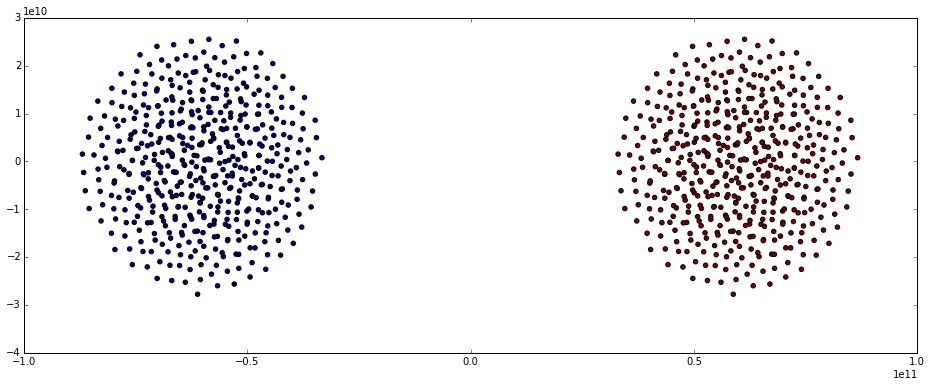

In [8]:
plt.figure(figsize=(16,6))
plt.scatter(xyDistribution[:,0], xyDistribution[:,1], c=planetDistribution)
plt.xlim(-1e11,1e11)
plt.ylim(-4e10,3e10)